In [1]:
# Notebook setup
import nengo                                # neural network simulation library
import numpy as np                          # a scientific computing library
from matplotlib import pyplot as plt        # a plotting library
plt.rcParams['axes.labelsize'] = 20         # set default plot axes label font size
plt.rcParams['axes.titlesize'] = 24         # set default plot title font size
plt.rcParams['legend.fontsize'] = 18        # set default plot legend font size
# make plots inline in the notebook instead of creating a new window

from nengo.utils.ensemble import tuning_curves
from numpy.linalg import svd
%matplotlib inline

# Bonus Problem

In this problem we will employ more sophisticated mathematical tools to understand the decoding process. Every matrix ${\bf A} \in \mathbb{R}^{\text{m} \times \text{n}}$ has a *singular value decomposition*: 

$$ {\bf A} = {\bf U}{\bf \Sigma} {\bf V}^{\rm T}$$

where ${\bf U} \in \mathbb{R}^{\text{m} \times \text{m}}$ and ${\bf V}\in \mathbb{R}^{\text{n} \times \text{n}}$ are orthogonal matrices, and ${\bf \Sigma}$ is a diagonal matrix stacked on top of (m-n) rows of zeros (assuming that m > n). It is useful to note that the columns of ${\bf U}$ are an orthonormal basis for $\mathbb{R}^m$ and the columns of ${\bf V}$ are an orthonormal basis for $\mathbb{R}^n$. It is also useful to consider a different (but equivalent) way of expressing the SVD of ${\bf A}$:

$${\bf A} = \sum_{i = 1}^{n} \sigma_i {\bf u}_i {\bf v}_i^{\rm T}$$

where the ${\bf u}_i$ and ${\bf v}_i$ are columns of ${\bf U}$ and ${\bf V}$, called the left and right *singular vectors*, respectively, and the $\sigma_i$ are the associated *singular values*, such that 

$$ {\bf A}{\bf v}_i = \sigma_i {\bf u}_i $$


Note that you can compute the SVD of a matrix ${\bf A}$ using the numpy function "np.linalg.svd(A)".

Building finished in 0:00:01.                                                   


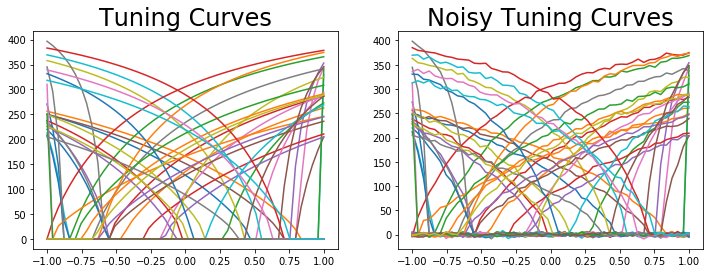

In [2]:
model = nengo.Network()
with model:
    ens_1d = nengo.Ensemble(500, dimensions=1)
with nengo.Simulator(model) as sim:
    eval_points, A = tuning_curves(ens_1d, sim)

sig = 2.5
Ahat = A + np.random.normal(size = A.shape)*sig
fig, ax = plt.subplots(1, 2, figsize = (12, 4))
ax[0].set_title("Tuning Curves")
ax[0].plot(eval_points, A[:, ::10]);
ax[1].set_title("Noisy Tuning Curves")
ax[1].plot(eval_points, Ahat[:, ::10]);

# 4.0
Using numpy's SVD function, compute the SVD of the tuning curve matrix $A$ (generated above). On three separate figures, plot
1. The first 50 singular values $\sigma_i$ of ${\bf A}$ (use a log scale for the y-axis with plt.semilogy)
2. The first 5 left singular vectors $u_i$ of ${\bf A}$
3. The first 5 Right singular vectors $v_i$ of ${\bf A}$

Next, compute the SVD of the noisy tuning curve matrix $\widehat{{{\bf A}}}$ (generated above). On three separate figures, plot
1. The first 50 singular values $\sigma_i$ of $\widehat{{\bf A}}$ (use a log scale for the y-axis with plt.semilogy)
2. The first 5 left singular vectors $u_i$ of $\widehat{{\bf A}}$
3. The first 5 right singular vectors $v_i$ of $\widehat{{\bf A}}$

Finally, on a separate figure, plot the relative error 
$$ r = \frac{\left|\sigma_i ({\bf A}) - \sigma_i (\widehat{{\bf A}})\right|}{ \sigma_i ({\bf A}) }$$
between the first 50 singular values of ${\bf A}$ and the first 50 singular values of $\widehat{{\bf A}}$.

Comment on what you see.

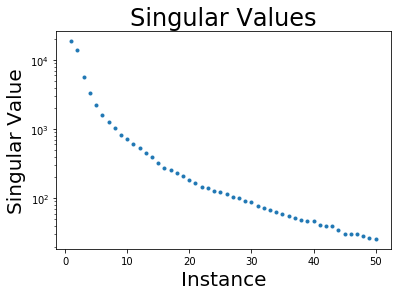

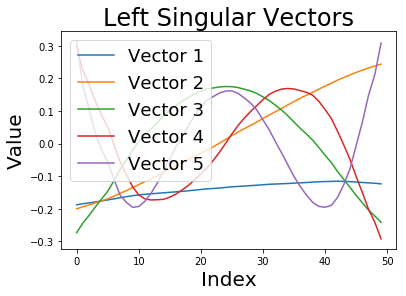

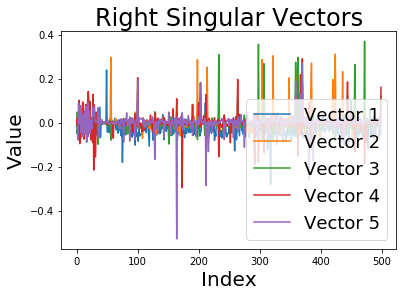

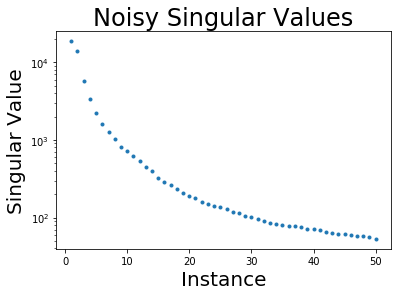

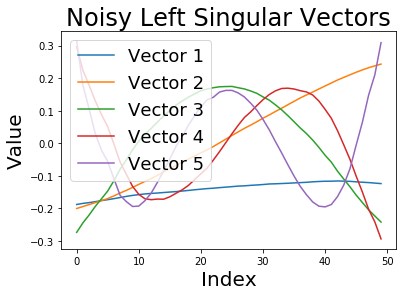

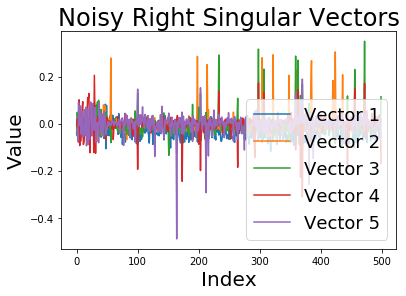

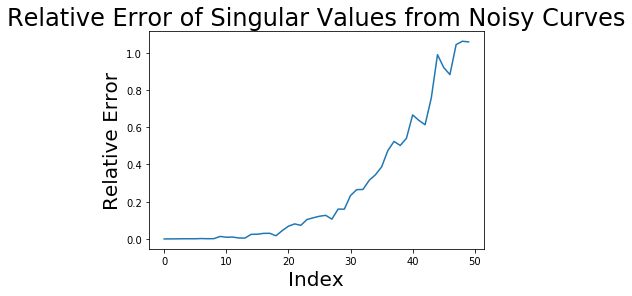

In [15]:
SVD = np.linalg.svd(A)

plt.figure()
plt.semilogy(np.arange(50)+1, SVD[1], '.')
plt.xlabel('Instance')
plt.ylabel('Singular Value')
plt.title('Singular Values')

plt.figure()
plt.plot(SVD[0][:,0], label='Vector 1')
plt.plot(SVD[0][:,1], label='Vector 2')
plt.plot(SVD[0][:,2], label='Vector 3')
plt.plot(SVD[0][:,3], label='Vector 4')
plt.plot(SVD[0][:,4], label='Vector 5')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Left Singular Vectors')
plt.legend()

plt.figure()
plt.plot(SVD[2][:,0], label='Vector 1')
plt.plot(SVD[2][:,1], label='Vector 2')
plt.plot(SVD[2][:,2], label='Vector 3')
plt.plot(SVD[2][:,3], label='Vector 4')
plt.plot(SVD[2][:,4], label='Vector 5')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Right Singular Vectors')
plt.legend()

SVDN = np.linalg.svd(Ahat)

plt.figure()
plt.semilogy(np.arange(50)+1, SVDN[1], '.')
plt.xlabel('Instance')
plt.ylabel('Singular Value')
plt.title('Noisy Singular Values')

plt.figure()
plt.plot(SVDN[0][:,0], label='Vector 1')
plt.plot(SVDN[0][:,1], label='Vector 2')
plt.plot(SVDN[0][:,2], label='Vector 3')
plt.plot(SVDN[0][:,3], label='Vector 4')
plt.plot(SVDN[0][:,4], label='Vector 5')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Noisy Left Singular Vectors')
plt.legend()

plt.figure()
plt.plot(SVDN[2][:,0], label='Vector 1')
plt.plot(SVDN[2][:,1], label='Vector 2')
plt.plot(SVDN[2][:,2], label='Vector 3')
plt.plot(SVDN[2][:,3], label='Vector 4')
plt.plot(SVDN[2][:,4], label='Vector 5')
plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Noisy Right Singular Vectors')
plt.legend()

E = np.abs(SVD[1] - SVDN[1])/SVD[1]

plt.figure()
plt.plot(E)
plt.xlabel('Index')
plt.ylabel('Relative Error')
plt.title('Relative Error of Singular Values from Noisy Curves')

## Comments on the above

As can be seen in the final graph, there is an interesting trend in the relative error of the singular values. The higher indicies have, in general, higher error. This seems to indicate that the singular values that are associated with the higher order singular vectors have higher error. 

## 4.1
Derive an expression for the solution to the least squares decoding problem

${\bf d}_\ast = \underset{{\bf d}}{\text{minimize}}\; \| {\bf A}{\bf d} - {\bf f} \|^2$

in terms of the left and right singular vectors of ${\bf A}$, the singular values of ${\bf A}$ and the function ${\bf f}$, sampled at the same values of $x$ and expressed as a column vector. 

Starting with the definition of error as 

$L =  \| {\bf A}{\bf d} - {\bf f} \|^2$

Expand and simplify to get

$L = {\bf d}^T{\bf A}^T{\bf A}{\bf d} - {\bf d}^T{\bf A}^T{\bf f} +  {\bf f}^T{\bf f} $

take the derivative with respect to d and set to zero then simplify 

${\bf d}_{\ast} = ({\bf A}^T{\bf A})^{-1}{\bf A}^T{\bf f}$

plugging in the SVD of A and simplifying to get 

$ {\bf d}_{\ast} = {\bf V}{\bf \Sigma}^{-1}{\bf U}^T{\bf f}$

## 4.2

Using your solution to 4.1, give a simple expression for the solution to the least squares decoding problem when the target function is $u_i$ (one of the left singular vectors of $A$). Specifically, derive an expression for

${\bf d}_{\ast, i} = \underset{{\bf d}}{\text{minimize}}\; \| {\bf A}{\bf d} - {\bf u}_i \|^2$


$ {\bf d}_{\ast, i} = {\bf V}{\bf \Sigma}^{-1}{\bf U}^T{\bf u}_i$

$ {\bf d}_{\ast, i} = {\bf V}[(1/ {\sigma}_1(u_1 u_i), 1/{\sigma}_2(u_2 u_i), ... 1/{\sigma}_m(u_m u_i)]^T $


## 4.3

In 4.0, you explored the effect of noise on the singular values $\sigma_i$ of $A$. Given this observation and your answer to 4.2, how much error do you expect when decoding $u_i$ from the noisy tuning curves (i.e., $\widehat{{\bf A}}$) as a function of $i$? What is the general trend? Back up your answer by measuring the decoding error empirically and plotting it as a function of $i$. Specifically, for each $i$, compute the error

$$ E = \| \widehat{{\bf A}}{\bf d}_{\ast, i} - {\bf u}_i \|^2 $$

Can you derive an analytical expression for this error?


In [30]:
SVD = np.linalg.svd(A)
SVDN = np.linalg.svd(Ahat)

d = []
E = []

for i in range(SVD[0].shape[0]):
    ui = np.reshape(SVD[0][:,i], (-1,1))
    d_star = np.linalg.pinv(A.T.dot(A)).dot(A.T).dot(ui)
    d.append(d_star)
    e = np.sqrt(np.mean((Ahat.dot(d_star)-ui)**2))
    E.append(e)

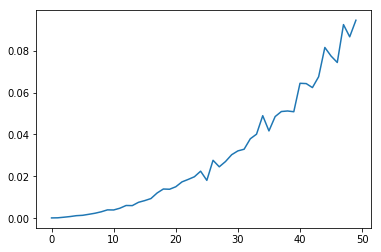

In [31]:
plt.plot(E)

## 4.4

Building off of your answer to 4.3, predict which types of functions you can decode most accurately (in the presence of noise) from the tuning curve matrix ${\bf A}$. Can you give a procedure that will allow you to estimate roughly how accurately you can decode a given function ${\bf f}$ from a fixed tuning curve matrix ${\bf A}$?
